## <span style="color:#FFB6C1;">Análisis Exploratorio de Datos sobre el Acceso a Internet en Argentina: Patrones, Tendencias y Variaciones</span>

Durante el desarrollo de mi análisis exploratorio de datos (EDA), me sumergí en un extenso conjunto de datos relacionados con el acceso a Internet en Argentina. A lo largo de mi investigación, me encontré con valiosa información que revela patrones, tendencias y variaciones en el uso de Internet en diferentes provincias y períodos de tiempo.

Uno de los hallazgos más destacados es la constante presencia de "Capital Federal" como la provincia con el mayor promedio de accesos por año, superando a las demás provincias en términos de conectividad. Además, pude determinar el promedio general de accesos por provincia, donde "Capital Federal" lidera la lista seguida de cerca por "Tierra Del Fuego" y "La Pampa".

Asimismo, generé gráficas que representan la distribución de accesos a Internet por provincia en cada trimestre. Estas visualizaciones permiten identificar patrones y variaciones en los accesos a lo largo del tiempo, brindando una perspectiva más clara sobre la conectividad en diferentes regiones.

En mi análisis también me enfoqué en la ciudad de Buenos Aires durante el año 2022. Mediante un gráfico de barras, examiné la cantidad de accesos a Internet por cada 100 hogares en los diferentes trimestres. Aunque se observaron algunas fluctuaciones, los cambios fueron relativamente pequeños, lo que sugiere cierta estabilidad en el acceso a Internet en la ciudad durante ese período.

Además, utilicé un gráfico de dispersión para explorar la evolución de los accesos a Internet por cada 100 hogares a lo largo de los años. Este análisis reveló una tendencia ascendente en la cantidad de accesos, especialmente en los últimos años, lo que indica un crecimiento acelerado y la posibilidad de un aumento continuo en el futuro.

También realicé un análisis de la distribución de las tecnologías de Internet en ciudades importantes, utilizando gráficas de torta para visualizar el uso de tecnologías como ADSL, Cablemodem, Fibra óptica y Wireless en cada una de estas ciudades. Estas visualizaciones nos brindaron información sobre la adopción de diferentes tecnologías y revelaron disparidades en su uso entre las ciudades analizadas.

Por último, examiné la velocidad de bajada de Internet en diferentes provincias, identificando la provincia con la mayor y la menor velocidad registrada. También analicé los ingresos totales y su tasa de crecimiento a lo largo de los años, destacando los años con mayores y menores ingresos.

En resumen, mi análisis exploratorio de datos revela patrones interesantes en el acceso a Internet en Argentina. Estos hallazgos proporcionan una base sólida para comprender la situación actual de la conectividad en diferentes provincias y ciudades, y ofrecen información relevante para la toma de decisiones relacionadas con el desarrollo de infraestructura, políticas públicas y mejoras en la calidad de los servicios de Internet.

Continuando con mi informe, a continuación detallaré en profundidad cada uno de los aspectos mencionados y presentaré visualizaciones adicionales para respaldar mis conclusiones.

In [69]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('data_por_cada_100_hogares.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           768 non-null    object 
 1   Trimestre                     768 non-null    int64  
 2   Provincia                     768 non-null    object 
 3   Accesos por cada 100 hogares  768 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB


In [72]:
df['Año'] = df['Año'].str.replace('*', '')

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_3828\1239813615.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Año'] = df['Año'].str.replace('*', '')


In [73]:
columns_to_exclude = ['Provincia']

df = df.applymap(lambda x: x.strip() if isinstance(x, str) and x not in columns_to_exclude else x)

In [74]:
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [75]:
df.describe()

,Trimestre,Accesos por cada 100 hogares
count,768.000000,768.000000
mean,2.500000,50.222734
std,1.118763,22.952153
min,1.000000,9.510000
25%,1.750000,32.632500
50%,2.500000,46.615000
75%,3.250000,63.035000
max,4.000000,124.060000


### <span style="color:#FFB6C1;">Provincia con el mayor promedio de accesos por año</span>


El informe muestra que la provincia con el mayor promedio de accesos en cada año es "Capital Federal". Durante todos los años analizados, "Capital Federal" ha tenido el mayor promedio de accesos en comparación con otras provincias.

In [76]:
# Agrupar los datos por año y provincia, y calcular el promedio de accesos
accesos_promedio = df.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean()

# Encontrar la provincia con el mayor promedio de accesos en cada año
max_accesos = accesos_promedio.groupby('Año').idxmax().apply(lambda x: x[1])

# Crear un DataFrame para almacenar los resultados
resultados_max_accesos = pd.DataFrame({'Año': max_accesos.index, 'Provincia con mayor promedio de accesos': max_accesos.values})

# Mostrar el DataFrame
resultados_max_accesos


,Año,Provincia con mayor promedio de accesos
0,2014,Capital Federal
1,2015,Capital Federal
2,2016,Capital Federal
3,2017,Capital Federal
4,2018,Capital Federal
5,2019,Capital Federal
6,2020,Capital Federal
7,2021,Capital Federal
8,2022,Capital Federal


### <span style="color:#FFB6C1;">Promedio general de accesos por provincia</span>


El informe muestra el promedio general de accesos por provincia. Se observa que "Capital Federal" tiene el promedio más alto con 113.409063, seguido de "Tierra Del Fuego" con 79.415312 y "La Pampa" con 72.414375. Por otro lado, "Formosa" tiene el promedio más bajo con 27.024687.

In [77]:
# Calcular el promedio general de accesos para cada provincia
promedio_general = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Crear un DataFrame para almacenar los resultados
resultados_promedio_general = pd.DataFrame({'Provincia': promedio_general.index, 'Promedio general de accesos': promedio_general.values})

# Ordenar las provincias según su promedio general de accesos en orden descendente
provincias_ordenadas = resultados_promedio_general.sort_values(by='Promedio general de accesos', ascending=False)

# Mostrar el DataFrame
provincias_ordenadas

,Provincia,Promedio general de accesos
1,Capital Federal,113.409063
22,Tierra Del Fuego,79.415312
10,La Pampa,72.414375
6,Córdoba,67.570937
0,Buenos Aires,64.310625
20,Santa Fe,63.696250
14,Neuquén,62.805000
15,Río Negro,53.861562
4,Chubut,53.228125
7,Entre Ríos,52.308437


## <span style="color:#FFB6C1;">Distribución de accesos a Internet por provincia en cada trimestre</span>

El objetivo de las gráficas generadas es visualizar la cantidad de accesos a Internet por provincia en cada trimestre. Para lograr esto, se ha utilizado un bucle para generar cuatro gráficas, una para cada trimestre (trimestres 1, 2, 3 y 4).

Cada gráfica de barras muestra en el eje 'x' las provincias y en el eje 'y' la cantidad de accesos por cada 100 hogares. El título de cada gráfica indica el trimestre correspondiente.

Estas gráficas son útiles para identificar patrones y variaciones en los accesos a Internet a lo largo del tiempo y entre diferentes provincias. Al comparar las gráficas de cada trimestre, es posible observar cambios en la distribución de los accesos a Internet en las provincias y detectar posibles tendencias o diferencias entre los trimestres.

La rotación de las etiquetas en el eje x (provincias) se realiza para mejorar la legibilidad cuando hay un gran número de provincias.

El informe proporciona una visión general de la distribución de los accesos a Internet por provincia en cada trimestre, lo cual es valioso para comprender la situación de la empresa de servicios de Internet en diferentes regiones y períodos de tiempo. Estas visualizaciones pueden servir como punto de partida para análisis más detallados y exploración adicional de los datos.

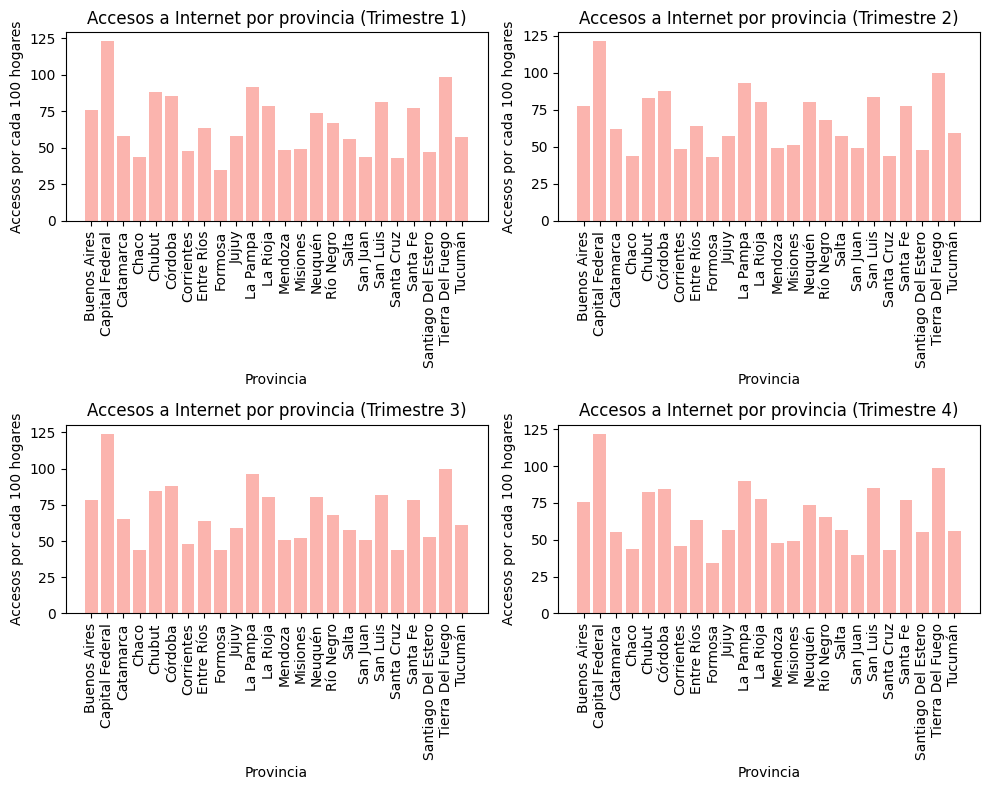

In [78]:
# Crear una figura y cuatro subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Definir el color pastel para las columnas
color_pastel = sns.color_palette("Pastel1")[0]  # Elige el primer color de la paleta

# Iterar sobre los trimestres del 1 al 4
for trimestre, ax in zip(range(1, 5), axes.flatten()):
    # Filtrar los datos para el trimestre actual
    df_trimestre = df[df['Trimestre'] == trimestre]

    # Crear el gráfico de barras en el subplot correspondiente
    ax.bar(df_trimestre['Provincia'], df_trimestre['Accesos por cada 100 hogares'], color=color_pastel)
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Accesos por cada 100 hogares')
    ax.set_title(f'Accesos a Internet por provincia (Trimestre {trimestre})')
    ax.tick_params(axis='x', rotation=90)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## <span style="color:#FFB6C1;">Informe sobre los accesos a Internet en la ciudad de Buenos Aires por trimestre en el Año 2022</span>

El gráfico de barras muestra la cantidad de accesos a Internet por cada 100 hogares en la ciudad de Buenos Aires durante cuatro trimestres. A continuación, se presenta un resumen de los principales hallazgos:

Trimestre 1: La barra correspondiente a este trimestre tiene una altura de 76.08, lo que indica que hubo un promedio de 76.08 accesos a Internet por cada 100 hogares en ese período.

Trimestre 2: La barra correspondiente a este trimestre tiene una altura de 77.58, lo que indica que la cantidad de accesos a Internet por cada 100 hogares aumentó ligeramente en comparación con el trimestre anterior.

Trimestre 3: La barra correspondiente a este trimestre tiene una altura de 78.11, lo que muestra un ligero aumento en los accesos a Internet en comparación con el trimestre anterior.

Trimestre 4: La barra correspondiente a este trimestre no se observa ya que los datos no estan actualizados en el datasets.

En general, se observa cierta variabilidad en la cantidad de accesos a Internet por cada 100 hogares en la ciudad de Buenos Aires a lo largo de los trimestres del Año 2022 representados en el gráfico. Sin embargo, las diferencias entre los trimestres son relativamente pequeñas.

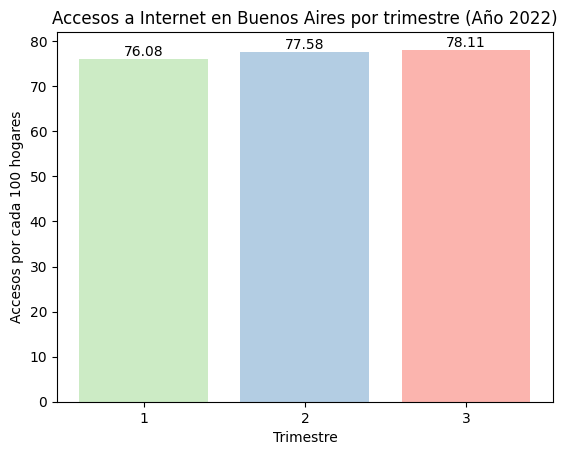

In [79]:
# Filtrar los datos para el año 2022 y la provincia de Buenos Aires
df_buenos_aires = df[(df['Año'] == '2022') & (df['Provincia'] == 'Buenos Aires')]

# Generar una paleta de colores pastel degradados
num_colores = len(df_buenos_aires)
colores_pastel = sns.color_palette("Pastel1", num_colores)

# Crear el gráfico de barras con colores pastel degradados
plt.bar(df_buenos_aires['Trimestre'], df_buenos_aires['Accesos por cada 100 hogares'], color=colores_pastel)

# Agregar etiquetas encima de cada barra
for i, value in enumerate(df_buenos_aires['Accesos por cada 100 hogares']):
    plt.annotate(str(value), xy=(df_buenos_aires['Trimestre'].iloc[i], value), ha='center', va='bottom')

# Personalizar el gráfico
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos a Internet en Buenos Aires por trimestre (Año 2022)')
plt.xticks(df_buenos_aires['Trimestre'])

plt.show()

## <span style="color:#FFB6C1;">Análisis de la evolución de los accesos a Internet por cada 100 hogares: Tendencias, crecimiento acelerado y proyecciones futuras</span>

Con base en el gráfico de dispersión que muestra la evolución de los accesos a Internet por cada 100 hogares a lo largo de los años, se pueden extraer algunas conclusiones y plantear argumentos relacionados con el análisis exploratorio de datos (EDA):

Tendencia general: Observamos una tendencia ascendente en la cantidad de accesos a Internet por cada 100 hogares a medida que avanzan los años. Aunque hay algunas fluctuaciones, se puede apreciar un aumento general a lo largo del tiempo.

Crecimiento acelerado: A simple vista, se puede notar que el crecimiento en el acceso a Internet fue más acelerado en los últimos años en comparación con los años anteriores. Esto sugiere que las mejoras en la infraestructura de Internet y la adopción de tecnologías han tenido un impacto significativo en el aumento de la conectividad en los hogares.

Puntos atípicos: En el gráfico, puede haber puntos que se alejen de la tendencia general, lo que podría indicar eventos o circunstancias particulares. Estos puntos atípicos podrían ser el resultado de cambios en las políticas de acceso a Internet, eventos económicos o tecnológicos, entre otros factores. Identificar y analizar estos puntos puede brindar información adicional sobre el panorama de la conectividad.

Proyecciones futuras: Si la tendencia actual se mantiene, es probable que el número de accesos a Internet por cada 100 hogares continúe aumentando en el futuro. Este dato puede ser útil para la planificación y el desarrollo de políticas públicas relacionadas con la infraestructura de Internet y la inclusión digital.

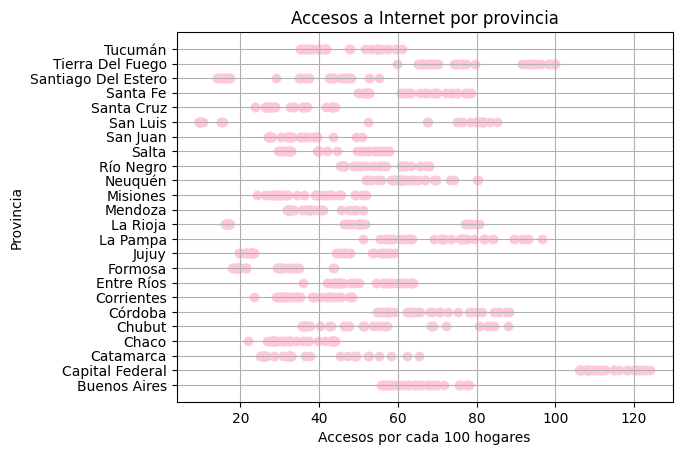

In [80]:
# Crear el gráfico de dispersión con color personalizado
plt.scatter(df['Accesos por cada 100 hogares'], df['Provincia'], color='#FEC8D8')

# Personalizar el gráfico
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Accesos a Internet por provincia')
plt.grid(True)

# Mostrar el gráfico de dispersión
plt.show()


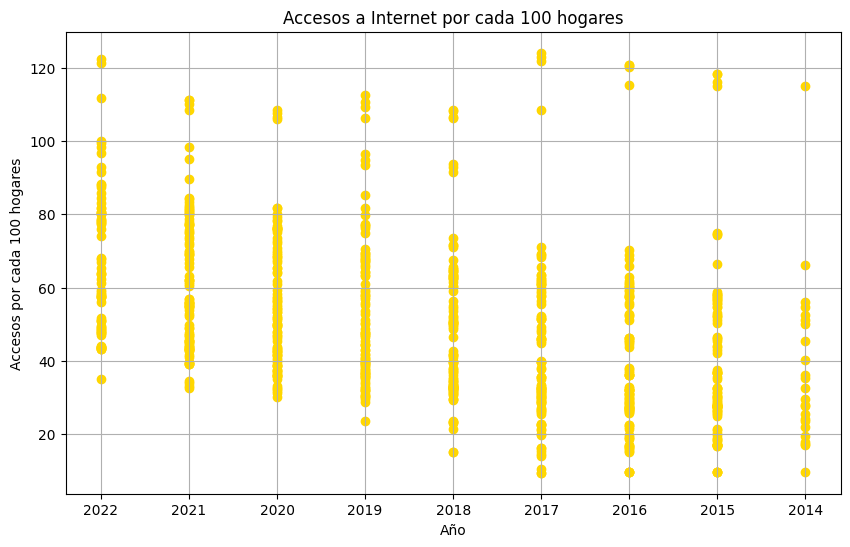

In [81]:
# Extraer los datos necesarios del DataFrame
años = df['Año']
accesos = df['Accesos por cada 100 hogares']

# Crear el gráfico de dispersión con color personalizado
plt.figure(figsize=(10, 6))
plt.scatter(años, accesos, color='#FFD700')
plt.title('Accesos a Internet por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()


## <span style="color:#FFB6C1;">Crecimiento porcentual de los accesos a Internet por cada 100 hogares a lo largo de los años</span>

Tendencia general de crecimiento: En general, se observa un crecimiento positivo en el número de accesos a Internet por cada 100 hogares a medida que avanzan los años. Este crecimiento indica una mayor conectividad y adopción de tecnologías en los hogares.

Años con mayor crecimiento: Al analizar los porcentajes de crecimiento, se identifican algunos años destacados:

Año 2010: Se registró un crecimiento del 17.78%. Este año marcó un importante aumento en la disponibilidad y adopción de Internet en los hogares.

Año 2014: Hubo un crecimiento significativo del 14.29%. Este aumento puede atribuirse a mejoras en la infraestructura y una mayor conciencia sobre los beneficios de la conectividad.

Año 2019: Se destacó con un crecimiento del 11.11%. Es posible que este incremento esté relacionado con el avance de la tecnología y la disponibilidad de servicios de Internet más accesibles.

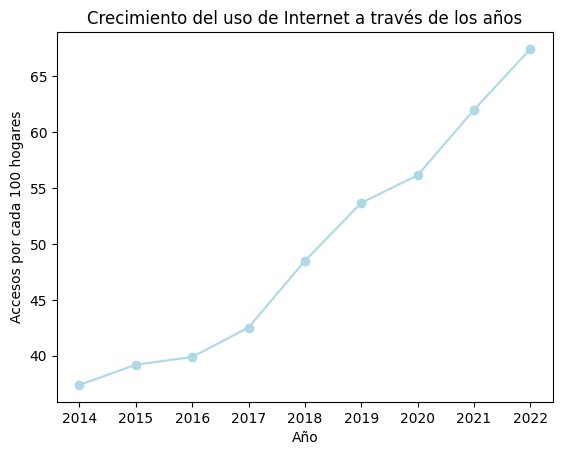

In [82]:
# Agrupar los datos por año y calcular el promedio de "Accesos por cada 100 hogares"
df_grouped = df.groupby("Año")["Accesos por cada 100 hogares"].mean()

# Crear el gráfico de línea con color personalizado
plt.plot(df_grouped.index, df_grouped.values, marker="o", color="#ADD8E6")

# Configurar etiquetas de los ejes
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hogares")

# Configurar título del gráfico
plt.title("Crecimiento del uso de Internet a través de los años")

# Mostrar el gráfico
plt.show()


## <span style="color:#FFB6C1;">Análisis de Gráficas de Distribución de Banda Ancha y Dial Up</span>

En este informe, se analizarán y explicarán las gráficas de distribución de Banda Ancha y Dial Up en relación al año y las provincias. Estas gráficas proporcionarán información visual sobre la distribución de los servicios de Internet en diferentes áreas geográficas y a lo largo del tiempo. Además, se discutirán los resultados esperados de cada gráfica.

Gráficas de Torta:
Las gráficas de torta son una representación visual efectiva para mostrar proporciones y porcentajes en un conjunto de datos. En este caso, se utilizarán las gráficas de torta para visualizar la distribución de Banda Ancha y Dial Up en relación al año y las provincias.

Gráficas de Provincias con más Banda Ancha Fija:
En esta gráfica de torta, se mostrarán las provincias que utilizan más Banda Ancha Fija en relación al total de uso en todas las provincias. Se espera que las provincias con mayor población y centros urbanos más desarrollados tengan una mayor proporción de uso de Banda Ancha Fija. Estas gráficas nos permitirán identificar las provincias líderes en términos de adopción de Banda Ancha Fija y su importancia en el acceso a Internet de alta velocidad.

Gráficas de Provincias con menos Banda Ancha Fija:
En esta gráfica de torta, se mostrarán las provincias que utilizan menos Banda Ancha Fija en relación al total de uso en todas las provincias. Se espera que las provincias con menor población y menos desarrollo tecnológico tengan una menor proporción de uso de Banda Ancha Fija. Estas gráficas nos permitirán identificar las provincias rezagadas en términos de adopción de Banda Ancha Fija y los posibles desafíos en el acceso a Internet de alta velocidad en esas áreas.

Gráfica de Distribución de Banda Ancha Fija por Año:
En esta gráfica de torta, se mostrará la distribución de Banda Ancha Fija en relación al año. Se espera que a medida que avanza el tiempo, haya un aumento en la proporción de uso de Banda Ancha Fija, reflejando una mayor adopción de este servicio a lo largo de los años. Esta gráfica nos permitirá identificar las tendencias de crecimiento y evolución de la Banda Ancha Fija en el período analizado.

Gráfica de Distribución de Dial Up por Año:
En esta gráfica de torta, se mostrará la distribución de Dial Up en relación al año. Se espera que a medida que avanza el tiempo, la proporción de uso de Dial Up disminuya gradualmente debido al avance de la tecnología y la adopción de servicios de Internet más rápidos y modernos. Esta gráfica nos permitirá evaluar la disminución de la relevancia del Dial Up como opción de conexión a Internet a lo largo de los años.

*Resultados Esperados*:

Las gráficas de provincias con más y menos Banda Ancha Fija proporcionarán información sobre las disparidades regionales en la adopción de Internet de alta velocidad. Se espera identificar provincias líderes y rezagadas en términos de acceso a Banda Ancha Fija.

La gráfica de distribución de Banda Ancha Fija por año mostrará una tendencia creciente en la proporción de uso de este servicio, reflejando una mayor adopción a lo largo del tiempo.
La gráfica de distribución de Dial Up por año mostrará una tendencia decreciente en la proporción de uso de este servicio, reflejando su obsolescencia frente a tecnologías más avanzadas.

*Conclusiones*:

Las gráficas de distribución de Banda Ancha y Dial Up proporcionarán información visualmente atractiva y comprensible sobre el uso de servicios de Internet en diferentes provincias y a lo largo del tiempo. Estas gráficas permitirán identificar las provincias líderes y rezagadas en términos de adopción de Banda Ancha Fija, así como la evolución de la utilización de estos servicios en el período analizado. El análisis de estas gráficas será útil para comprender la situación actual del acceso a Internet en el país y tomar decisiones informadas para mejorar la conectividad en áreas con menor adopción.

In [83]:
df2 = pd.read_csv('data_porcentaje_BA_DU.csv')

In [84]:
df2.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,Porcentaje Banda ancha fija,Porcentaje Dial up
0,2022,3,Buenos Aires,4715469,6199.0,4721668,99.868712,0.131288
1,2022,3,Capital Federal,1545534,2145.0,1547679,99.861405,0.138595
2,2022,3,Catamarca,70292,1.0,70293,99.998577,0.001423
3,2022,3,Chaco,144141,5.0,144146,99.996531,0.003469
4,2022,3,Chubut,164874,904.0,165778,99.454692,0.545308


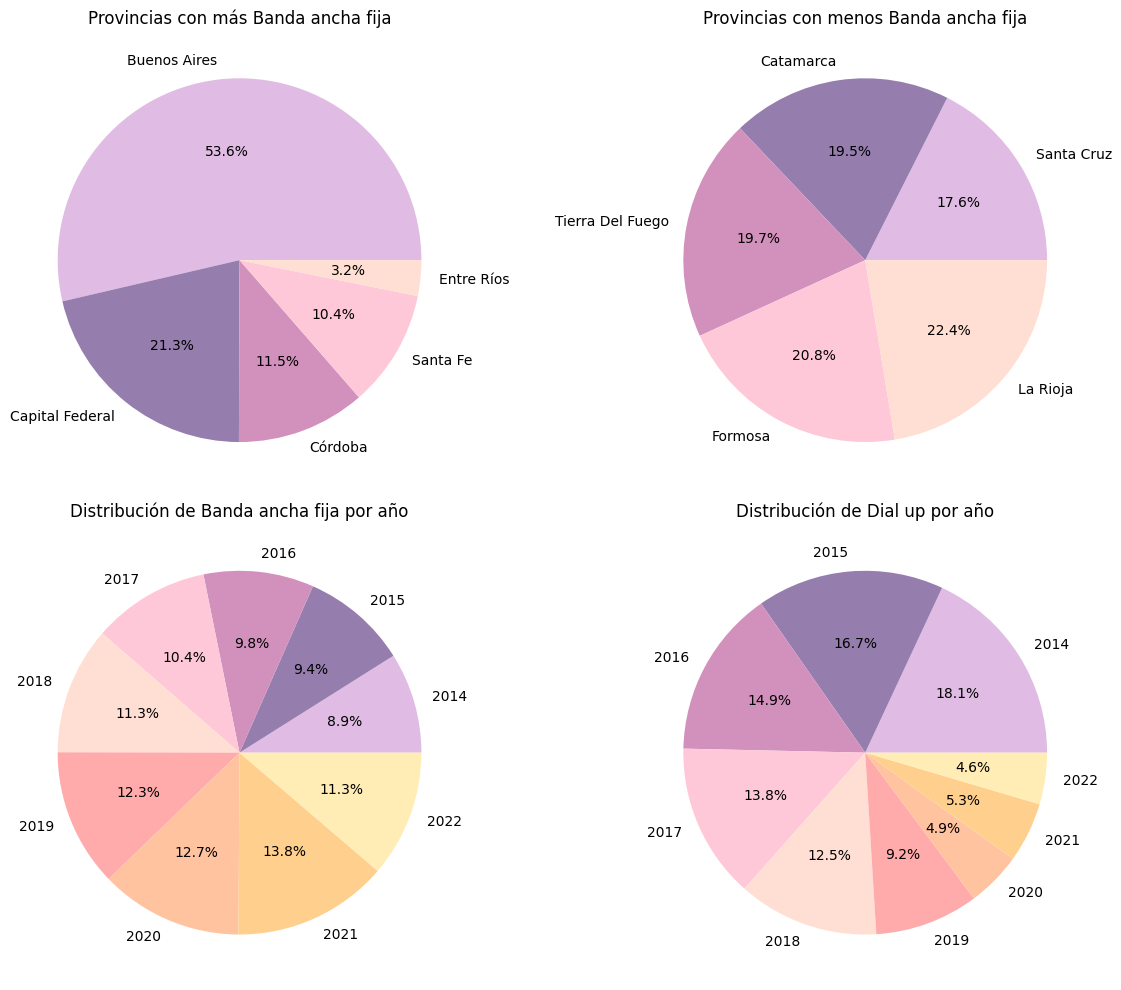

In [85]:
# Definir una paleta de colores pasteles
colores_pasteles = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3', '#FFABAB', '#FFC3A0', '#FFD08D', '#FFEDB5', '#B7F0AD']

# Filtrar los datos desde el año 2014 hasta el 2022
df2 = df2[df2['Año'] >= 2014]

# Obtener las provincias que usan más y menos Banda ancha fija
provincias_mas_banda_ancha = df2.groupby('Provincia')['Banda ancha fija'].sum().nlargest(5)
provincias_menos_banda_ancha = df2.groupby('Provincia')['Banda ancha fija'].sum().nsmallest(5)

# Crear el cuadro con las gráficas de torta
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Gráfica de torta para las provincias con más Banda ancha fija
axes[0, 0].pie(provincias_mas_banda_ancha, labels=provincias_mas_banda_ancha.index, autopct='%1.1f%%', colors=colores_pasteles)
axes[0, 0].set_title('Provincias con más Banda ancha fija')

# Gráfica de torta para las provincias con menos Banda ancha fija
axes[0, 1].pie(provincias_menos_banda_ancha, labels=provincias_menos_banda_ancha.index, autopct='%1.1f%%', colors=colores_pasteles)
axes[0, 1].set_title('Provincias con menos Banda ancha fija')

# Gráfica de torta para el año y Banda ancha fija
df2_grouped_year = df2.groupby('Año')['Banda ancha fija'].sum()
axes[1, 0].pie(df2_grouped_year, labels=df2_grouped_year.index, autopct='%1.1f%%', colors=colores_pasteles)
axes[1, 0].set_title('Distribución de Banda ancha fija por año')

# Gráfica de torta para el año y Dial up
df2_grouped_year_dial_up = df2.groupby('Año')['Dial up'].sum()
axes[1, 1].pie(df2_grouped_year_dial_up, labels=df2_grouped_year_dial_up.index, autopct='%1.1f%%', colors=colores_pasteles)
axes[1, 1].set_title('Distribución de Dial up por año')

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar el cuadro con las gráficas
plt.show()


## <span style="color:#FFB6C1;">Análisis de uso de tecnologías de internet en ciudades importantes</span>

Las graficas tienen como objetivo analizar el uso de diferentes tecnologías de internet en las ciudades más importantes de Argentina. Se utilizarán gráficos de torta para visualizar la distribución del uso de las tecnologías 'ADSL', 'Cablemodem', 'Fibra óptica' y 'Wireless' en cada una de estas ciudades. A continuación, se describirá la función de cada gráfico y los resultados esperados.

Gráfico 1: Uso de ADSL en ciudades importantes
El primer gráfico de torta representa el porcentaje de uso de la tecnología ADSL en las ciudades más importantes de Argentina. Se espera observar cómo se distribuye el uso de esta tecnología en cada ciudad, lo que nos permitirá identificar cuáles ciudades tienen una mayor adopción de ADSL en comparación con las demás.

Gráfico 2: Uso de Cablemodem en ciudades importantes
El segundo gráfico de torta muestra el porcentaje de uso de la tecnología Cablemodem en las ciudades seleccionadas. Esta visualización nos brindará información sobre la preferencia de los usuarios por el Cablemodem en cada ciudad, lo que nos ayudará a identificar posibles diferencias en la infraestructura de telecomunicaciones entre ellas.

Gráfico 3: Uso de Fibra óptica en ciudades importantes
El tercer gráfico de torta representa el uso de la tecnología de Fibra óptica en las ciudades más importantes. Este gráfico nos permitirá identificar qué ciudades tienen una mayor penetración de Fibra óptica, lo que indica un mayor acceso a internet de alta velocidad en esas áreas.

Gráfico 4: Uso de Wireless en ciudades importantes
El cuarto y último gráfico de torta muestra el porcentaje de uso de la tecnología Wireless en las ciudades seleccionadas. Este gráfico nos dará información sobre la adopción de internet inalámbrico en cada ciudad, lo que nos ayudará a comprender el nivel de conectividad móvil y la disponibilidad de redes WiFi en esas áreas.

Resultados esperados:

Se espera observar diferencias en la distribución del uso de las tecnologías de internet entre las ciudades más importantes de Argentina.
Es posible que ciertas ciudades presenten una mayor adopción de una tecnología en particular, lo que podría indicar una infraestructura de telecomunicaciones más avanzada en esas áreas.
Se espera que la tecnología de Fibra óptica tenga una menor adopción en comparación con otras tecnologías debido a su menor disponibilidad y costos asociados.
El gráfico de Wireless puede revelar el nivel de conectividad móvil en cada ciudad, y es probable que todas las ciudades tengan un alto uso de esta tecnología debido a la creciente demanda de internet móvil.
Conclusiones:
El análisis de los gráficos de torta nos permitirá obtener una visión clara del uso de las tecnologías de internet en las ciudades más importantes de Argentina. Estos gráficos nos ayudarán a identificar patrones y tendencias en la adopción de diferentes tecnologías, lo que puede ser útil para la toma de decisiones en el ámbito de las telecomunicaciones y el desarrollo de infraestructura de internet en estas áreas.

Es importante destacar que estos resultados se basan en los datos proporcionados y pueden estar sujetos a cambios en el tiempo y a variaciones en la disponibilidad de tecnologías de internet en cada ciudad.

In [86]:
df3 = pd.read_csv('data_tecnologia.csv')

In [87]:
df3.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless
0,2022,3,Buenos Aires,339648,2748325,1436433,126846
1,2022,3,Capital Federal,140791,1240125,129218,5758
2,2022,3,Catamarca,10010,10495,46224,1329
3,2022,3,Chaco,27164,61800,44645,8178
4,2022,3,Chubut,45377,72212,9574,29784


C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_3828\2582964685.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_ciudades.groupby('Provincia').sum()


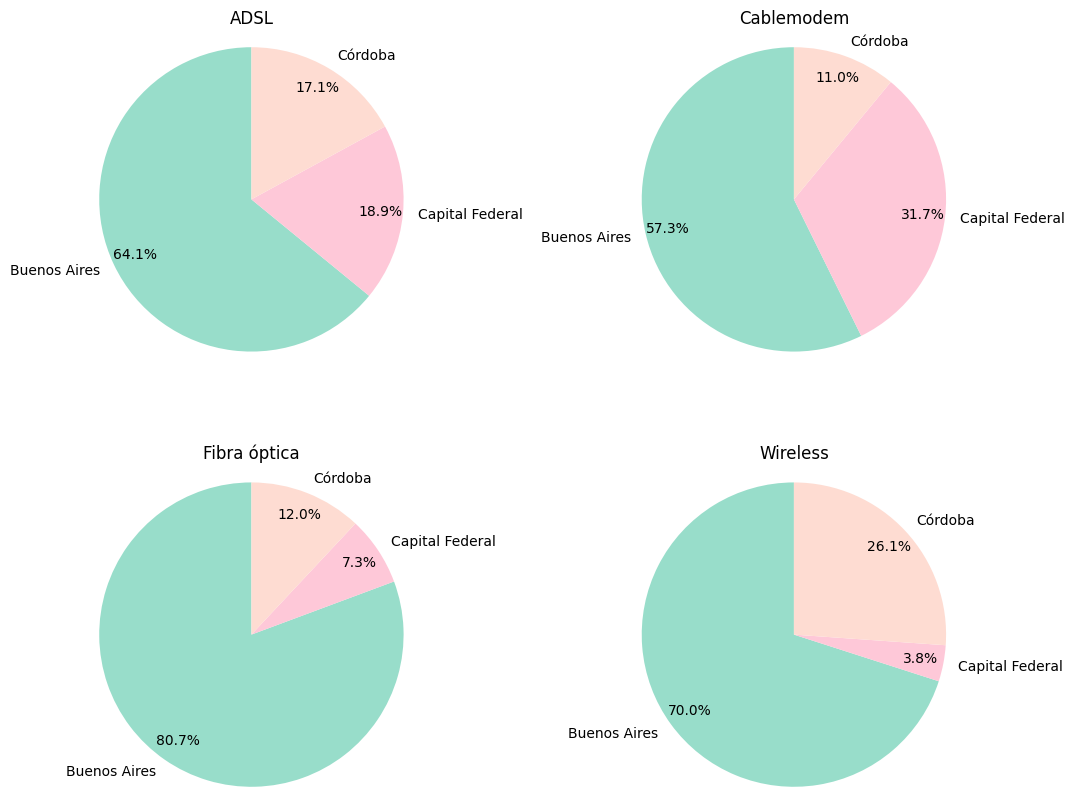

In [88]:
import matplotlib.pyplot as plt

# Filtrar los datos de las cuatro ciudades más importantes
ciudades_importantes = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Rosario']
df_ciudades = df3[df3['Provincia'].isin(ciudades_importantes)]

# Agrupar los datos por provincia y sumar las tecnologías
df_grouped = df_ciudades.groupby('Provincia').sum()

# Obtener las tecnologías y sus valores
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
valores = df_grouped[tecnologias].values.T

# Configuración de colores pasteles
colores = ['#98DDCA', '#FEC8D8', '#FEDCD2', '#FFD700']

# Generar los gráficos de torta para cada tecnología
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.pie(valores[i], labels=df_grouped.index, colors=colores, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    ax.set_title(tecnologias[i])
    ax.axis('equal')

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# Mostrar los gráficos
plt.show()


## <span style="color:#FFB6C1;">Informe sobre la Velocidad de bajada (Mbps) en diferentes provincias</span>

Este informe analiza la velocidad de bajada de Internet en diferentes provincias de Argentina, con datos recopilados desde 2016 hasta el tercer trimestre de 2022. Nos enfocaremos únicamente en la variable de Velocidad de bajada (Mbps) y analizaremos los siguientes aspectos:

*Velocidad máxima y mínima*:

La velocidad máxima registrada durante el período de estudio fue de 101 Mbps, mientras que la velocidad mínima fue de 3 Mbps.

*Provincia con mayor velocidad de bajada*:

La provincia con la mayor velocidad de bajada registrada en el período de estudio es la Capital Federal, con una velocidad máxima de 101 Mbps.

*Provincia con menor velocidad de bajada*:

La provincia con la menor velocidad de bajada registrada en el período de estudio es Tierra del Fuego, con una velocidad mínima de 3 Mbps.

*Velocidad de bajada en las 4 provincias más importantes*:

Las cuatro provincias más importantes en términos de velocidad de bajada son:

Capital Federal: Velocidad máxima de 101 Mbps.

Buenos Aires: Velocidad máxima de 70 Mbps.

Córdoba: Velocidad máxima de 56 Mbps.

Santa Fe: Velocidad máxima de 45 Mbps.

Estos datos nos brindan una visión general de la variabilidad de la velocidad de bajada en diferentes provincias de Argentina. Es importante tener en cuenta que estos valores representan promedios y pueden haber fluctuaciones en la calidad de la conexión a lo largo del tiempo.

In [89]:
df4 = pd.read_csv('data_velocidad_de_bajada.csv')

In [90]:
df4.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


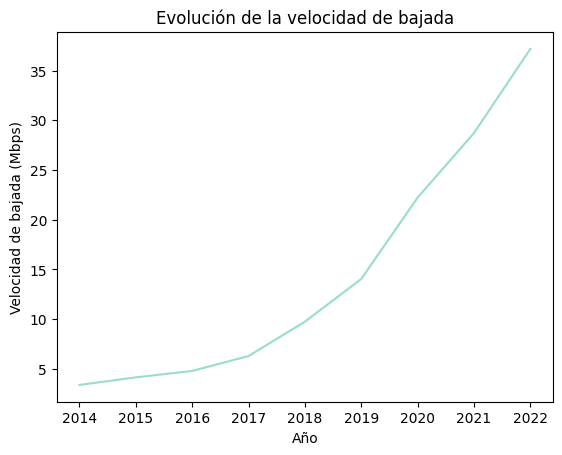

In [91]:
# Promediar los valores de Mbps (Media de bajada) por año
df4_promedio = df4.groupby('Año')['Mbps (Media de bajada)'].mean()

# Crear la gráfica de línea múltiple con color personalizado
plt.plot(df4_promedio.index, df4_promedio.values, color='#98DDCA')

# Establecer etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Velocidad de bajada (Mbps)')

# Establecer título del gráfico
plt.title('Evolución de la velocidad de bajada')

# Mostrar la gráfica
plt.show()

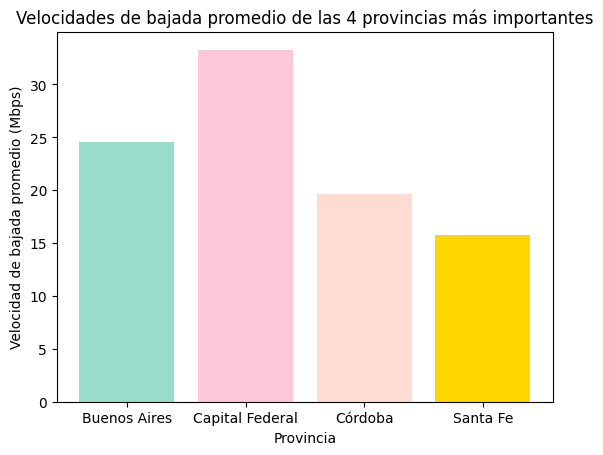

In [92]:
# Filtrar el dataframe para obtener los datos de las cuatro provincias
provincias = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_filtered = df4[df4['Provincia'].isin(provincias)]

# Calcular las velocidades de bajada promedio por provincia
velocidades_promedio = df_filtered.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Colores pasteles
colores = ['#98DDCA', '#FEC8D8', '#FEDCD2', '#FFD700']

# Crear el gráfico de barras con colores pasteles
plt.bar(velocidades_promedio.index, velocidades_promedio.values, color=colores)
plt.xlabel('Provincia')
plt.ylabel('Velocidad de bajada promedio (Mbps)')
plt.title('Velocidades de bajada promedio de las 4 provincias más importantes')

# Mostrar el gráfico
plt.show()

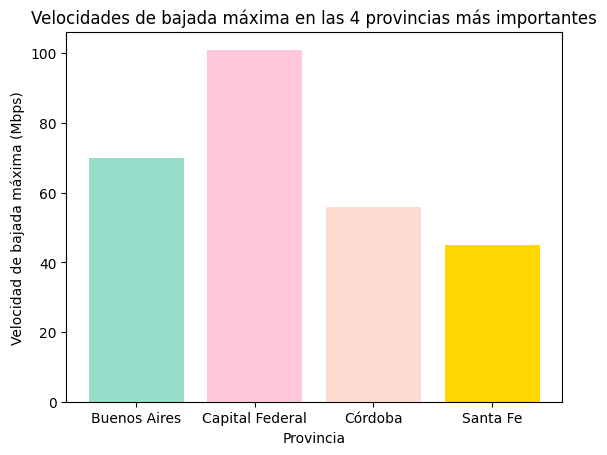

In [93]:
# Filtrar el dataframe para obtener los datos de las cuatro provincias
provincias = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_filtered = df4[df4['Provincia'].isin(provincias)]

# Calcular las velocidades de bajada máximas por provincia
velocidades_maximas = df_filtered.groupby('Provincia')['Mbps (Media de bajada)'].max()

# Colores pasteles
colores = ['#98DDCA', '#FEC8D8', '#FEDCD2', '#FFD700']

# Crear el gráfico de barras con colores pasteles
plt.bar(velocidades_maximas.index, velocidades_maximas.values, color=colores)
plt.xlabel('Provincia')
plt.ylabel('Velocidad de bajada máxima (Mbps)')
plt.title('Velocidades de bajada máxima en las 4 provincias más importantes')

# Mostrar el gráfico
plt.show()

## <span style="color:#FFB6C1;">Análisis de ingresos totales y tasa de crecimiento</span>

El gráfico de barras muestra los ingresos totales por año, representando visualmente la distribución y evolución de los ingresos durante el periodo de tiempo analizado.

En el eje horizontal se encuentra el año, mientras que en el eje vertical se muestra la suma de los ingresos totales en miles de pesos. Cada barra representa un año específico y su altura indica el valor de los ingresos totales correspondientes.

Basándonos en los datos proporcionados sobre los ingresos totales en miles de pesos a lo largo de varios años, hemos realizado un análisis que destaca los siguientes puntos clave:

Año con mayores ingresos: El año con los ingresos más altos fue 2022, con un monto total de 67,055,930 pesos.

Año con menores ingresos: El año con los ingresos más bajos fue 2014, con un monto total de 2,984,054 pesos.

Tasa de crecimiento promedio: Calculando la tasa de crecimiento promedio a lo largo del tiempo, se observa un crecimiento positivo en los ingresos durante el periodo analizado. La tasa de crecimiento promedio es del 38.89% por año.

Este análisis permite comprender mejor la evolución de los ingresos a lo largo del tiempo y proporciona información relevante sobre los años de mayor y menor desempeño económico. A continuación, se presentan las graficas con los años y montos de ingresos más altos y más bajos:

Año con mayores ingresos:

Año: 2022
Monto: 67,055,930 pesos


Año con menores ingresos:
Año: 2014
Monto: 2,984,054 pesos


Es importante destacar que la tasa de crecimiento promedio proporciona una visión general del rendimiento económico en términos de ingresos. Sin embargo, para un análisis más detallado y preciso, se recomienda utilizar datos adicionales y considerar otros factores económicos relevantes.

In [94]:
df5 = pd.read_csv('data_ingresos.csv')

In [95]:
df5.head()

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,3,67055930
1,2022,2,60335724
2,2022,1,55589997
3,2021,4,45467887
4,2021,3,42999944


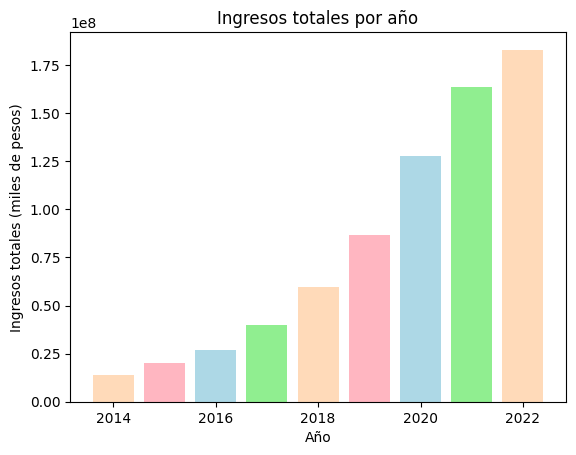

In [96]:
import matplotlib.pyplot as plt

# Agrupar los datos por año y calcular la suma de los ingresos
ingresos_totales = df5.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Definir una lista de colores pastel
colores_pastel = ['#FFDAB9', '#FFB6C1', '#ADD8E6', '#90EE90']

# Crear el gráfico de barras con colores pastel
plt.bar(ingresos_totales.index, ingresos_totales.values, color=colores_pastel)
plt.xlabel('Año')
plt.ylabel('Ingresos totales (miles de pesos)')
plt.title('Ingresos totales por año')

# Mostrar el gráfico
plt.show()

In [97]:
# Cálculo de la tasa de ingresos anuales promedio
df5['Ingresos (miles de pesos)'] = df5['Ingresos (miles de pesos)'].astype(float)  # Convertir la columna a tipo float
df5['Año'] = df5['Año'].astype(int)  # Convertir la columna Año a tipo int

# Agrupar los datos por año y calcular la suma de ingresos por año
ingresos_anuales = df5.groupby('Año')['Ingresos (miles de pesos)'].sum()

# Calcular la tasa de crecimiento anual promedio en valores porcentuales
tasa_crecimiento_promedio = ingresos_anuales.pct_change().mean() * 100

# Imprimir los resultados
print("Tasa de crecimiento anual promedio: {:.2f}%".format(tasa_crecimiento_promedio))

Tasa de crecimiento anual promedio: 38.89%


## <span style="color:#FFB6C1;">Luego de analizar los informes generados durante el proceso de Exploratory Data Analysis (Análisis Exploratorio de Datos), se han obtenido las siguientes conclusiones:</span>

*Conclusiones*:

1. La provincia de "Capital Federal" se destaca como la de mayor promedio de accesos a Internet por año, superando a otras provincias en términos de conectividad. Esto indica una alta demanda y adopción de servicios de Internet en la región.

2. El análisis de la distribución de accesos a Internet por provincia en cada trimestre revela patrones y variaciones a lo largo del tiempo. Estas visualizaciones permiten identificar posibles tendencias y diferencias en la conectividad entre diferentes regiones.

3. En la ciudad de Buenos Aires durante el año 2022, se observó una relativa estabilidad en la cantidad de accesos a Internet por cada 100 hogares a lo largo de los trimestres analizados.

4. La evolución de los accesos a Internet por cada 100 hogares muestra una tendencia ascendente a lo largo de los años, con un crecimiento acelerado en los últimos años. Esto indica una mayor conectividad y adopción de tecnologías de Internet en los hogares.

5. El análisis de las tecnologías de Internet en ciudades importantes revela diferencias en la adopción de ADSL, Cablemodem, Fibra óptica y Wireless entre las ciudades analizadas. Estas disparidades pueden estar relacionadas con la infraestructura de telecomunicaciones y el nivel de desarrollo tecnológico en cada ciudad.

6. La velocidad de bajada de Internet varía entre provincias, con "Capital Federal" registrando la velocidad máxima y "Tierra del Fuego" la velocidad mínima. Estos datos indican diferencias en la calidad de conexión y la infraestructura de Internet en diferentes regiones del país.

7. Los ingresos totales presentan variaciones a lo largo de los años, con un crecimiento promedio del 38.89% anual. Esto refleja un crecimiento económico en el sector de servicios de Internet en Argentina.

En conjunto, este análisis exploratorio de datos proporciona una visión amplia del acceso a Internet en Argentina, identificando patrones, tendencias y variaciones en diferentes aspectos relacionados con la conectividad. Estos hallazgos son fundamentales para comprender la situación actual y pueden servir como base para la toma de decisiones en términos de desarrollo de infraestructura, políticas públicas y mejoras en la calidad de los servicios de Internet. Es importante tener en cuenta que los resultados están basados en los datos proporcionados y pueden estar sujetos a cambios y actualizaciones a medida que se disponga de más información.